In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data : 
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Cheking for missing values : 
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
data = data.drop_duplicates()

In [5]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
# Select the columns :
categorical = ["job", "marital", "education", "contact","month","poutcome"]

for features in categorical :
    data[features] = data[features].astype('category').cat.codes

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


____

# Hierarchical Clustering :

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Define features and target 
X = data.drop('deposit', axis=1)  # Features
y = data['deposit']  # Target variable

In [10]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Use a smaller sample of data for better readability
sample_size = 200  # Adjust the number of samples for visualization
X_sample = X_scaled[:sample_size]

In [12]:
# Generate the linkage matrix
linkage_matrix = linkage(X_sample, method='ward')

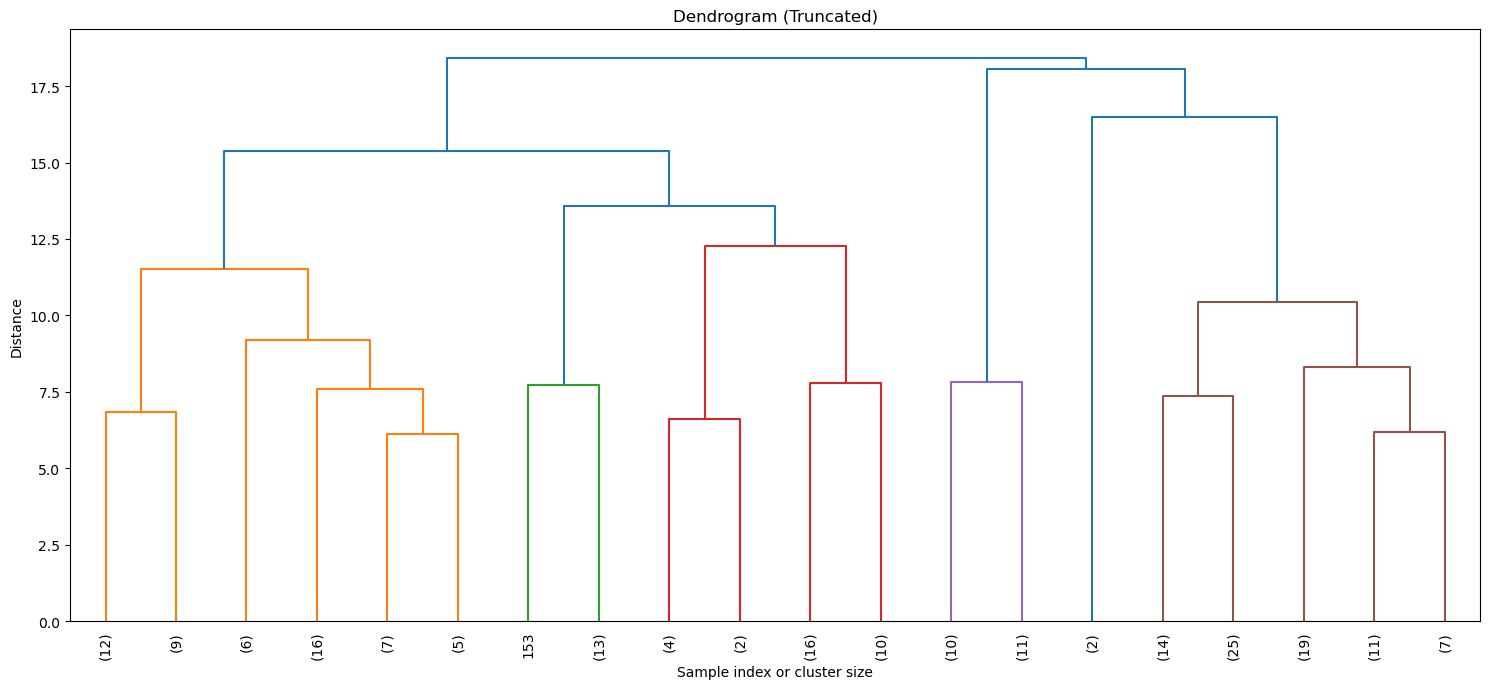

In [13]:
# Plot the dendrogram
plt.figure(figsize=(15, 7))  # Increase figure size for clarity
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Truncated)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("dendrogram.png", dpi=300)  # Adjust dpi for resolution

plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering
n_clusters = 4  # Choose based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

In [15]:
# Evaluate clustering
sil_score = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.10791425646375047
Davies-Bouldin Score: 2.2436786872859114


In [16]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming `labels` from hierarchical clustering and `y_scaled` as the target
# Map clusters to target labels
def map_clusters_to_labels(labels, y):
    cluster_to_label = {}
    unique_clusters = np.unique(labels)
    
    for cluster in unique_clusters:
        mask = labels == cluster
        majority_label = np.bincount(y[mask]).argmax()
        cluster_to_label[cluster] = majority_label
    
    mapped_labels = np.array([cluster_to_label[cluster] for cluster in labels])
    return mapped_labels

# Map clusters to labels
mapped_labels = map_clusters_to_labels(labels, y)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y, mapped_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 60.47%
